In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm

sys.path.append("..")

In [2]:
from manage_data import get_conditions, load_result, delete_all, delete_result

In [3]:
base_conditions = get_conditions(
    N_particle = None,
    N_ensemble = None,
    velocity = None,
    Lambda = None,
    boundary = None,
    N_bins = None,
    gamma = None,
    slope = None,
    temperature = None,
    tau = None,
    Da = None,
    delta_t = None,
    initial = None,
    sampling = None,
)
print(base_conditions)

[]


In [4]:
df = load_result(conditions=base_conditions)
df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,average,std,time
0,a7e396,10000,100,1.0,0.01,5.0,40,1.0,0.46,1.0,1.0,1.0,0.01,10000,10000,0.001684,0.203105,5607.067723
1,d2675f,10000,100,1.0,0.01,5.0,40,1.0,0.06,1.0,1.0,1.0,0.01,10000,10000,0.000284,0.026701,4403.440623
2,55d5d7,10000,100,1.0,0.01,5.0,40,1.0,0.09,1.0,1.0,1.0,0.01,10000,10000,-0.000181,0.040031,4489.882403
3,b1863d,10000,100,1.0,0.02,5.0,40,1.0,0.07,1.0,1.0,1.0,0.01,10000,10000,0.000293,0.044356,5213.377304
4,82877c,10000,100,1.0,0.01,5.0,40,1.0,0.31,1.0,1.0,1.0,0.01,10000,10000,0.000381,0.139716,4424.909402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,856b1b,10000,100,1.0,0.01,5.0,40,1.0,0.13,1.0,1.0,1.0,0.01,10000,10000,0.000454,0.058422,4448.853579
76,648a76,10000,100,1.0,0.01,5.0,40,1.0,0.21,1.0,1.0,1.0,0.01,10000,10000,0.000564,0.094464,4453.446594
77,5e91ed,10000,100,1.0,0.01,5.0,40,1.0,0.23,1.0,1.0,1.0,0.01,10000,10000,-0.000643,0.102393,4488.038927
78,19ed38,10000,100,1.0,0.01,5.0,40,1.0,0.17,1.0,1.0,1.0,0.01,10000,10000,-0.000217,0.076568,4425.361438


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['a7e396', 'd2675f', '55d5d7', 'b1863d', '82877c', '19f1bb', 'ad20ea', '0cf0e5', '26cbc4', '6e99cd', 'ece906', '81281b', 'd0f60a', 'da39c3', '62b808', 'ea6ca5', '9a351a', 'd7d892', '4bdd8b', '0d0849', '6bda65', '3a08cc', '27b77b', 'ffdd96', '4e2a46', '66934b', '485844', '228a90', '55100f', '8be7f3', 'f54721', 'fb0875', '20dc50', '03c84c', '7f6faf', 'f54cfb', '24db4b', '5c078d', 'c22664', 'd0495c', '78ddca', 'aac2f5', 'ee6d55', '0287a3', '53644b', 'ecf14c', 'cdacc0', 'f10d14', '9fa16e', 'e159a8', '747450', '6fdabc', '0f439b', '189d7a', '199652', '9e984c', '4ead64', 'a46b68', 'cf3f15', 'e24471', '5d20e0', '698b3a', '22c73d', 'df7a53', 'd78e17', '6f79bc', 'f045d2', '64037b', '449372', '3ade36', 'cafe04', 'a99d10', '871bc3', 'e37788', '43a02e', '856b1b', '648a76', '5e91ed', '19ed38', '52ce7a']
80


In [6]:
# delete_all()

In [7]:
x, y = sorted(set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy()))
print(f"{x=}, {y=}")

x=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5], y=[0.01, 0.02]


In [14]:
data = np.zeros((len(x), len(y)))

for i, slope in enumerate(x):
    for j, Lambda in enumerate(y):
        conditions = get_conditions(slope=slope, Lambda=Lambda)
        value = df.query(" and ".join(conditions))["average"].to_numpy()
        
        if len(value) == 0: continue
        else: data[i,j] = value[0]

data = np.transpose(data)
# print(data)

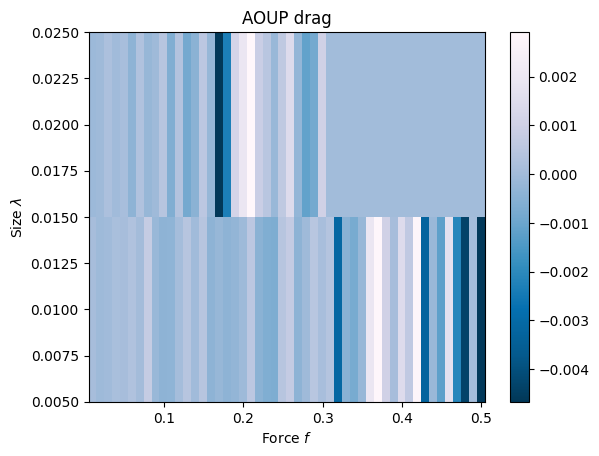

In [15]:
fig, ax = plt.subplots()

c = ax.pcolor(x, y, data, shading='auto',
               norm=Normalize(vmin=data.min(), vmax=data.max()), cmap='PuBu_r')

fig.colorbar(c, ax=ax)

ax.set_title("AOUP drag")
ax.set_xlabel(r"Force $f$")
ax.set_ylabel(r"Size $\lambda$")

plt.show()